In [4]:
import numpy as np 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Flatten

import matplotlib.pyplot as plt 
import tensorflow as tf 

In [5]:
tf.test.is_gpu_available()

False

In [6]:
# preparing independent and dependent features 
def prepare_data(timeSeriesData,n_features):
    X, y = [], []
    
    for i in range(len(timeSeriesData)):
        end_idx = i+ n_features
        
        if end_idx >= len(timeSeriesData):
            break 
        seq_x, seq_y = timeSeriesData[i:end_idx], timeSeriesData[end_idx]
        
        X.append(seq_x)
        y.append(seq_y)
        
    return np.array(X), np.array(y)

In [7]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [8]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [9]:
X.shape

(6, 3)

In [10]:
n_features = 1 
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [12]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences = True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss= 'mse')

model.fit(X, y, epochs = 300, verbose = 0)

# Predicting for the next 10 data 

In [27]:
x_input = np.array([187, 196, 210])

In [28]:
temp_input = list(x_input)
lst_output = []
i = 0 
while(i<10):
    if(len(temp_input)>3):
        #print(temp_input)
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose = 0)
        print("{} day output {}".format(i, yhat))
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        
        lst_output.append(yhat[0][0])
        i+=1
        
    else: 
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose =0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
        

[222.63327]
1 day output [[233.71925]]
2 day output [[246.9532]]
3 day output [[259.58148]]
4 day output [[272.08124]]
5 day output [[285.654]]
6 day output [[299.10724]]
7 day output [[312.87964]]
8 day output [[327.32385]]
9 day output [[341.95642]]


In [29]:
lst_output

[222.63327,
 233.71925,
 246.9532,
 259.58148,
 272.08124,
 285.654,
 299.10724,
 312.87964,
 327.32385,
 341.95642]

# Visualization the Output

In [30]:
day_new = np.arange(1, 10)
day_pred = np.arange(10, 20)

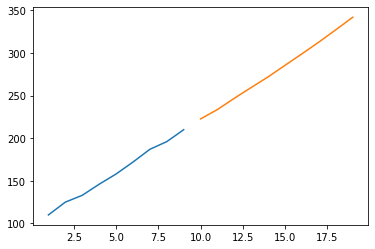

In [32]:
plt.plot(day_new, timeseries_data)
plt.plot(day_pred, lst_output)

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
